### Import the libraries

In [5]:
!pip install tensorflow

In [6]:
!pip install tensorflow-datasets

In [19]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import pandas as pd  
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA




In [9]:
fuel = pd.read_excel('Weekly Fuel Prices .xlsx')


In [10]:
fuel['Date'] = pd.to_datetime(fuel['Date'], format='%Y-%m-%d')
fuel.set_index('Date', inplace=True)


fuel.index = pd.to_datetime(fuel.index)

In [8]:
fuel.sample(5)

,Date,Petrol (USD),Diesel (USD)
782,2018-06-04,128.429743,132.342001
556,2014-02-03,128.854164,136.843692
368,2010-06-28,117.877241,120.379937
403,2011-02-28,129.724965,135.055629
510,2013-03-18,137.582644,144.841696


In [9]:
# "Date" kolonunu zaman serisi indeksi olarak ayarlama
fuel['Date'] = pd.to_datetime(fuel['Date'])
fuel.set_index('Date', inplace=True)

In [10]:
# Günlük ortalama fiyatları hesaplama
daily_average = fuel.resample('D').mean()

In [11]:
# Haftalık ortalama fiyatları hesaplama
weekly_average = fuel.resample('W').mean()

In [12]:
# Aylık ortalama fiyatları hesaplama
monthly_average = fuel.resample('M').mean()

In [13]:
# Yıllık ortalama fiyatları hesaplama
yearly_average = fuel.resample('Y').mean()

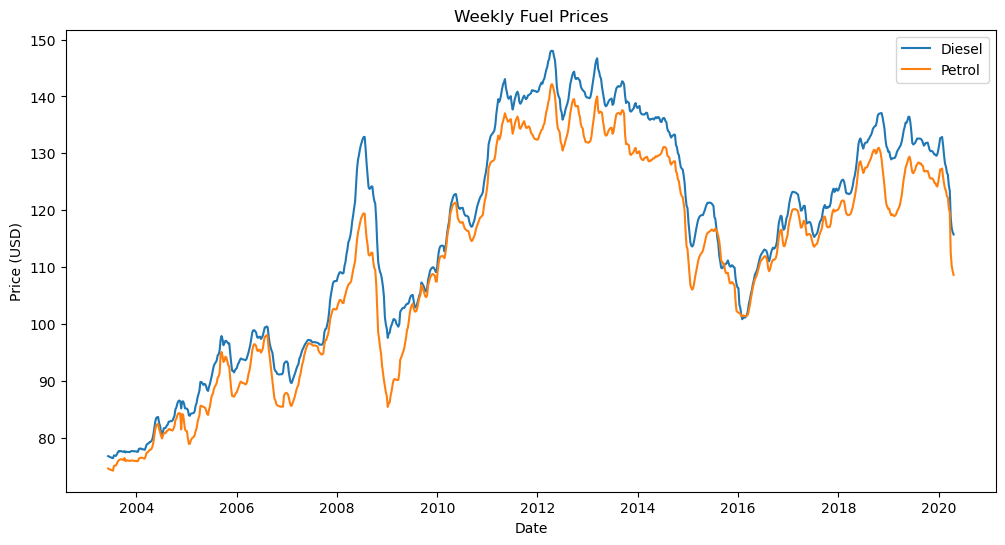

In [14]:
# Zaman serisi grafiği çizme
plt.figure(figsize=(12, 6))
plt.plot(fuel.index, fuel['Diesel (USD)'], label='Diesel')
plt.plot(fuel.index, fuel['Petrol (USD)'], label='Petrol')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Weekly Fuel Prices')
plt.legend()
plt.show()

In [15]:
shape = fuel.shape
print("Veri çerçevesinin şekli:", shape)

Veri çerçevesinin şekli: (881, 2)


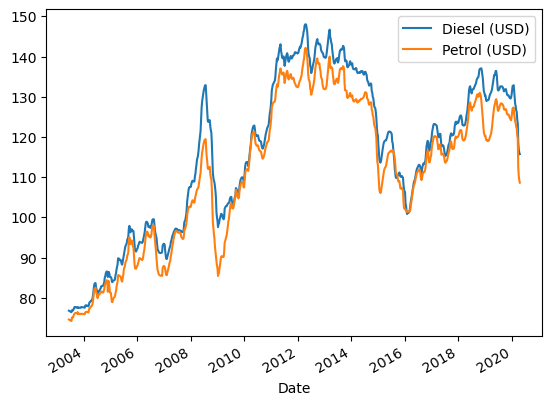

In [26]:

fuel = pd.read_excel('WeeklyFuelPrices.xlsx', parse_dates=['Date'], index_col='Date')

# Sütunları çizdirme
fuel[['Diesel (USD)', 'Petrol (USD)']].plot()

# Grafiği gösterme
plt.show()
plt.show()

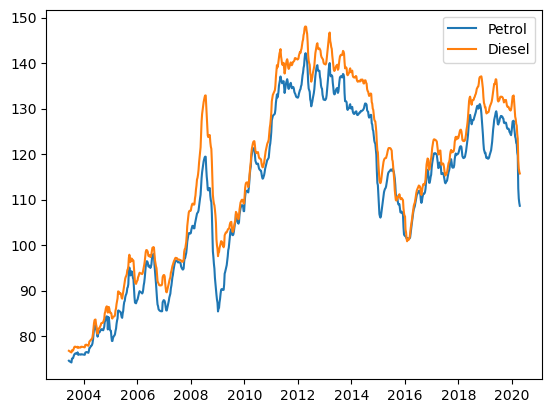

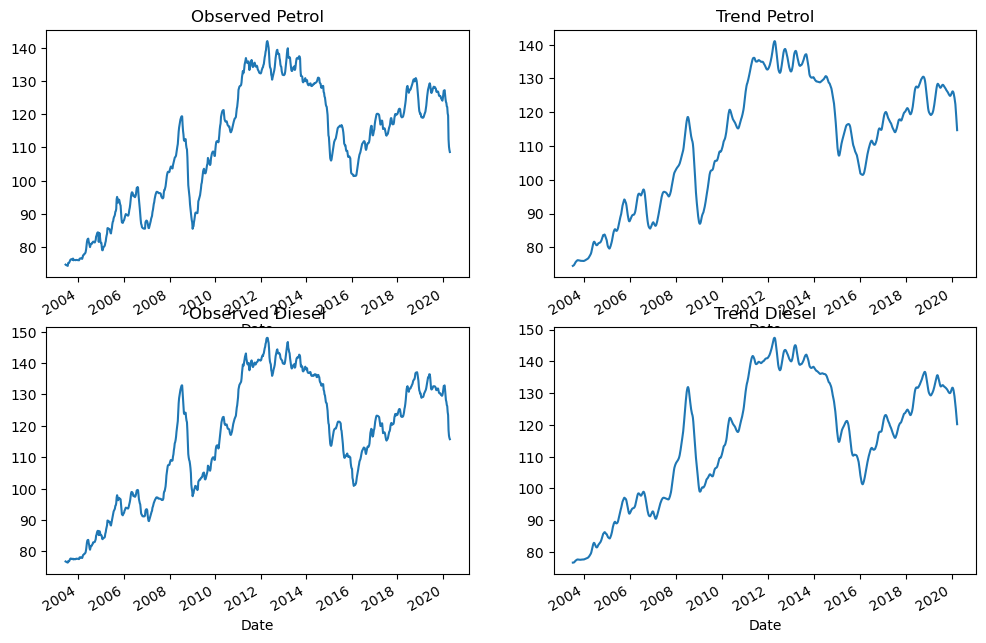

In [12]:
plt.plot(fuel['Petrol (USD)'])
plt.plot(fuel['Diesel (USD)'])
plt.legend(['Petrol', 'Diesel'])
plt.show()

petrol_decomp = seasonal_decompose(fuel['Petrol (USD)'], period=7)
diesel_decomp = seasonal_decompose(fuel['Diesel (USD)'], period=7)


fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 8))
petrol_decomp.observed.plot(ax=ax1[0], title='Observed Petrol')
diesel_decomp.observed.plot(ax=ax2[0], title='Observed Diesel')
petrol_decomp.trend.plot(ax=ax1[1], title='Trend Petrol')
diesel_decomp.trend.plot(ax=ax2[1], title='Trend Diesel')
plt.show()


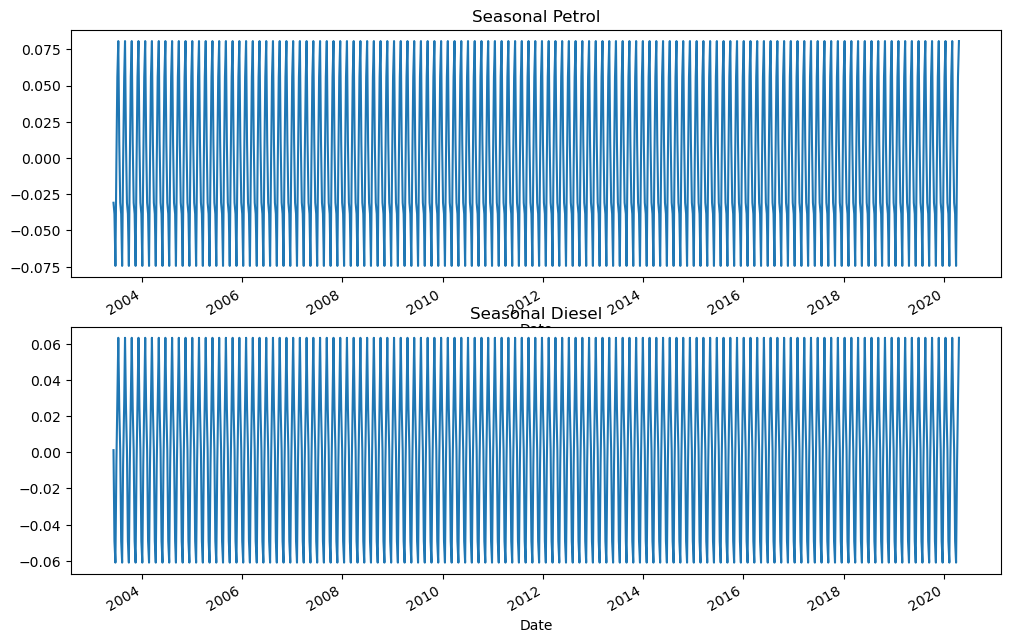

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
petrol_decomp.seasonal.plot(ax=ax1, title='Seasonal Petrol')
diesel_decomp.seasonal.plot(ax=ax2, title='Seasonal Diesel')
plt.show()

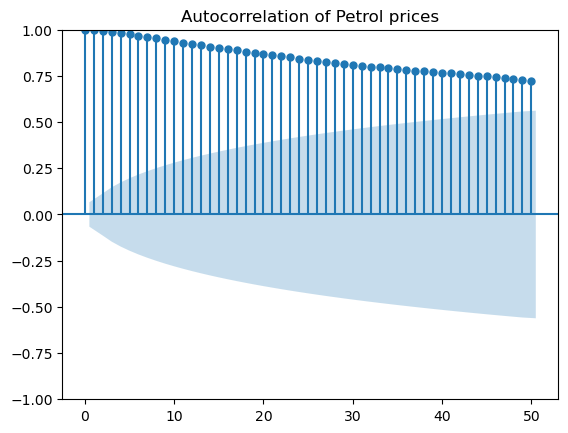

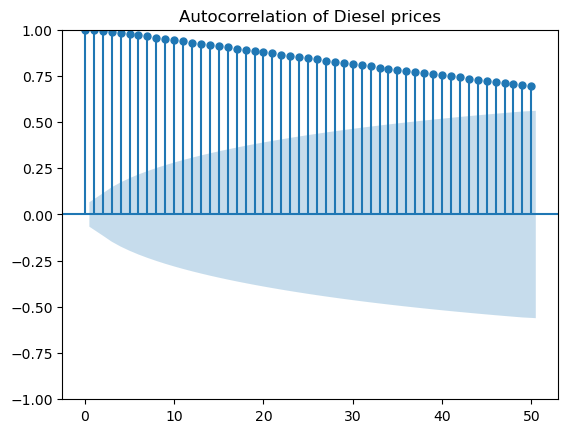

In [15]:
plot_acf(fuel['Petrol (USD)'], lags=50)
plt.title('Autocorrelation of Petrol prices')
plt.show()


plot_acf(fuel['Diesel (USD)'], lags=50)
plt.title('Autocorrelation of Diesel prices')
plt.show()

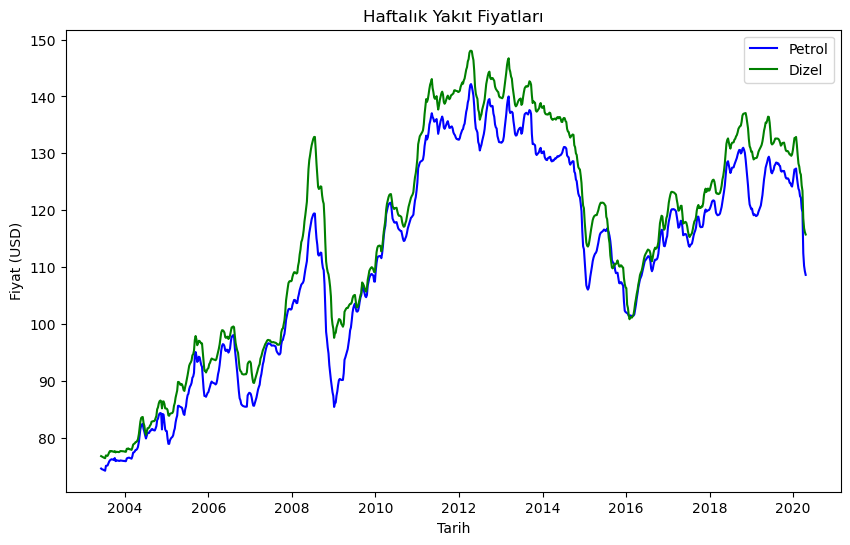

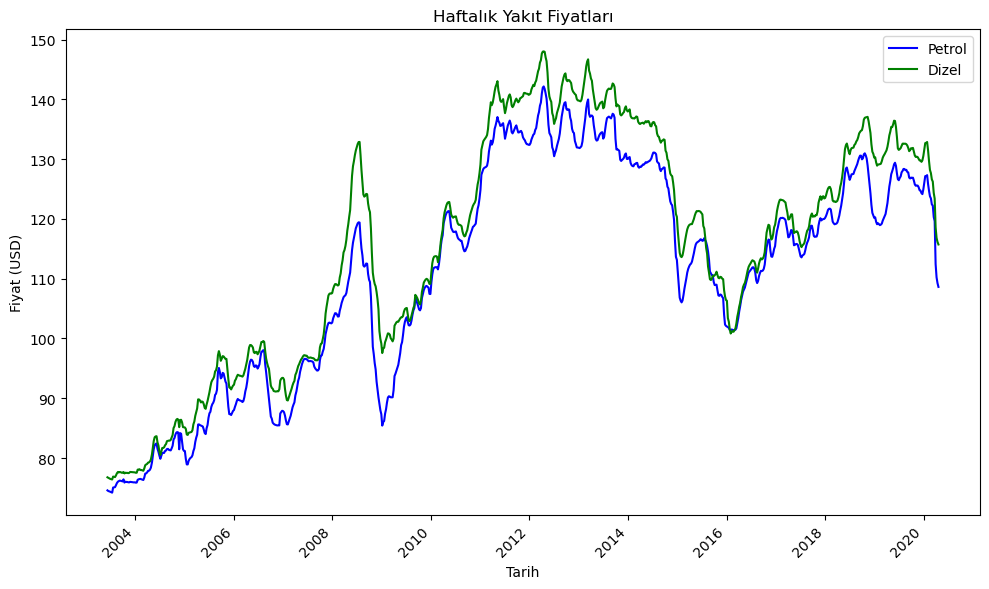

In [16]:
# Basit Çizgi Grafiği
plt.figure(figsize=(10, 6))
plt.plot(fuel.index, fuel['Petrol (USD)'], color='blue', label='Petrol')
plt.plot(fuel.index, fuel['Diesel (USD)'], color='green', label='Dizel')
plt.title('Haftalık Yakıt Fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()

# Dinamik Çizgi Grafiği
plt.figure(figsize=(10, 6))
plt.plot(fuel.index, fuel['Petrol (USD)'], color='blue', label='Petrol')
plt.plot(fuel.index, fuel['Diesel (USD)'], color='green', label='Dizel')
plt.title('Haftalık Yakıt Fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()

# X ekseni etiketlerini döndürme ve düzenleme
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [17]:
# Petrol verileri için ADF testini uygulayın
petrol_adf = adfuller(fuel['Petrol (USD)'])
print('Petrol ADF İstatistiği:', petrol_adf[0])
print('Petrol p-değeri:', petrol_adf[1])
print('Petrol Kritik Değerler:', petrol_adf[4])

# Dizel verileri için ADF testini uygulayın
dizel_adf = adfuller(fuel['Diesel (USD)'])
print('Dizel ADF İstatistiği:', dizel_adf[0])
print('Dizel p-değeri:', dizel_adf[1])
print('Dizel Kritik Değerler:', dizel_adf[4])

Petrol ADF İstatistiği: -2.2613759734543866
Petrol p-değeri: 0.18472762657497338
Petrol Kritik Değerler: {'1%': -3.437836947046742, '5%': -2.864845006291261, '10%': -2.5685298249098225}
Dizel ADF İstatistiği: -2.1587049758347923
Dizel p-değeri: 0.22157292570951947
Dizel Kritik Değerler: {'1%': -3.437836947046742, '5%': -2.864845006291261, '10%': -2.5685298249098225}


In [23]:
df_diff = fuel.diff().dropna()
print(df_diff.head())

            Petrol (USD)  Diesel (USD)
Date                                  
2003-06-16     -0.121141     -0.084340
2003-06-23     -0.045577     -0.068508
2003-06-30     -0.071145     -0.115286
2003-07-07     -0.068684     -0.047884
2003-07-14     -0.077160     -0.049256


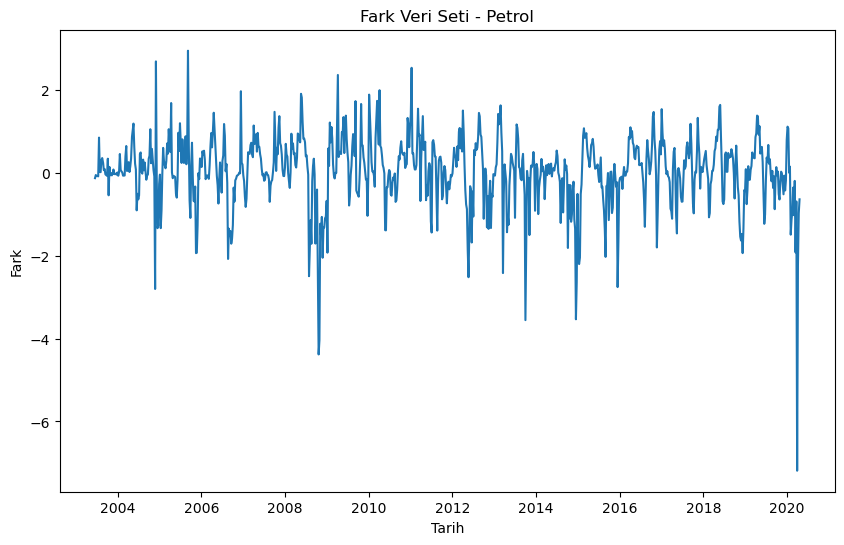

In [25]:
petrol_prices = fuel['Petrol (USD)']

# Verilerin farkını alın (first-order difference)
differenced_prices = petrol_prices.diff().dropna()

# Yeni veri setini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(differenced_prices)
plt.title('Fark Veri Seti - Petrol')
plt.xlabel('Tarih')
plt.ylabel('Fark')
plt.show()

In [1]:
# Be sure the new data set is fully stationary: 
print('Dickey-Fuller Test: ')



Dickey-Fuller Test: 


In [29]:
p = 1  # AR bileşeninin derecesi
d = 1  # I bileşeninin derecesi
q = 1  # MA bileşeninin derecesi
model = ARIMA(fuel['Petrol (USD)'], order=(p, d, q))
model_fit = model.fit()

# Sonraki n adet değeri tahmin etmek için modeli kullanın
n = 10  # Tahmin edilecek değer sayısı
forecast = model_fit.forecast(steps=n)

# Tahmin edilen değerleri yazdırın
print('Petrol Fiyatı Tahminleri:')
print(forecast)

c:\Users\izbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\izbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\izbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Petrol Fiyatı Tahminleri:
881    108.185890
882    107.877966
883    107.665779
884    107.519563
885    107.418807
886    107.349377
887    107.301534
888    107.268565
889    107.245847
890    107.230192
Name: predicted_mean, dtype: float64


c:\Users\izbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\izbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
